In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

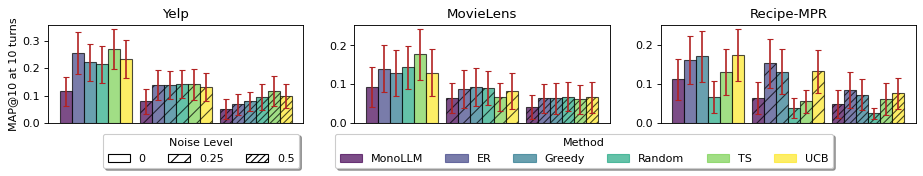

In [62]:
def map_10_noise():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    legend_methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)  
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']

    # Hard-code re-ordering


    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(titles[axis_num])

        # x = np.arange(len(methods))  # the label locations
        x = np.arange(len(noise_levels))  # the label locations
        width = 0.15  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        results_error = np.zeros((len(methods), len(noise_levels)))

        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[row_num, noise_count] = exp_results.loc[row_num, "map@9"]
                results_error[row_num, noise_count] = (exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]) / 2

        # Plot bars on subplot
        multiplier = 0
        for col_num, method in enumerate(methods):
            offset = width * multiplier
            rects = ax.bar(x + offset, results[col_num,:], width, yerr=results_error[col_num,:], hatch=hatches, color=colors[col_num], label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
            multiplier += 1

        # for col_num, noise_level in enumerate(noise_levels):
        #     offset = width * multiplier
        #     # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
        #     rects = ax.bar(x + offset, results[:,col_num], width, yerr=results_error[:,col_num], hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
        #     # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
        #     # ax.bar_label(rects, padding=3)
        #     multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.7) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in legend_methods], title='Method', loc='upper center', bbox_to_anchor=(0.9, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-0.6, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_noise()

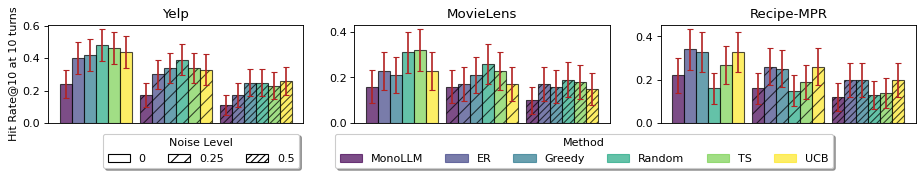

In [68]:
def recall_10_noise():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    legend_methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)  
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']

    # Hard-code re-ordering


    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(titles[axis_num])

        # x = np.arange(len(methods))  # the label locations
        x = np.arange(len(noise_levels))  # the label locations
        width = 0.15  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        results_error = np.zeros((len(methods), len(noise_levels)))

        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[row_num, noise_count] = exp_results.loc[row_num, "recall_10@9"]
                results_error[row_num, noise_count] = (exp_results.loc[row_num, "recall_10@9_ub"] - exp_results.loc[row_num, "recall_10@9_lb"]) / 2

        # Plot bars on subplot
        multiplier = 0
        for col_num, method in enumerate(methods):
            offset = width * multiplier
            rects = ax.bar(x + offset, results[col_num,:], width, yerr=results_error[col_num,:], hatch=hatches, color=colors[col_num], label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
            multiplier += 1

        # for col_num, noise_level in enumerate(noise_levels):
        #     offset = width * multiplier
        #     # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
        #     rects = ax.bar(x + offset, results[:,col_num], width, yerr=results_error[:,col_num], hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
        #     # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
        #     # ax.bar_label(rects, padding=3)
        #     multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("Hit Rate@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.7) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in legend_methods], title='Method', loc='upper center', bbox_to_anchor=(0.9, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-0.6, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_Recallat10_plot.png"
    fig.savefig(file_name)

    plt.show()

recall_10_noise()

KeyError: 4

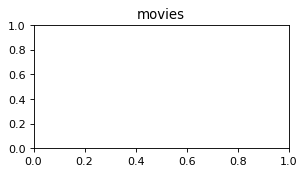

In [19]:
def map_10_10_items():
    # MAP@10 big plot
    folder_path = "./"
    datasets = ['movies', 'recipes', 'restaurants']
    methods = ['MonoLLM 10', 'MonoLLM 100', 'Thompson 10', 'Thompson 100', 'UCB 10', 'UCB 100',]
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    color_map = {methods[i]: colors[i] for i in range(len(methods))}

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(datasets[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        # results_error = np.zeros((len(methods), len(noise_levels)))

        # Just hard-code it all lol
        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            # Load in best results
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            results[1, noise_count] = exp_results.loc[0, "map@9"] # MonoLLM 100
            results[3, noise_count] = exp_results.loc[4, "map@9"] # Thompson 100
            results[5, noise_count] = exp_results.loc[5, "map@9"] # UCB 100

        mono_10_exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/10_items/mono/aggregated_results.csv")
        for noise_count, noise_level in enumerate(noise_levels):
            results[0, noise_count] = mono_10_exp_results.loc[noise_count, "map@9"] # Mono 10

        dt_10_exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/10_items/aggregated_results.csv")
        dt_10_noise_levels = [2,0,1] # Noise is in the wrong order in this file for some reason
        for noise_count, noise_level in enumerate(noise_levels):
            results[2, noise_count] = dt_10_exp_results.loc[(2*dt_10_noise_levels[noise_count]), "map@9"] # Thompson 10
            results[4, noise_count] = dt_10_exp_results.loc[(2*dt_10_noise_levels[noise_count])+1, "map@9"] # UCB 10

        # Plot bars on subplot
        multiplier = 0
        for col_num, noise_level in enumerate(noise_levels):
            offset = width * multiplier
            # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
            rects = ax.bar(x + offset, results[:,col_num], width, hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7)
            # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
            # ax.bar_label(rects, padding=3)
            multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc='upper center', bbox_to_anchor=(0.8, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-1, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_10_items()

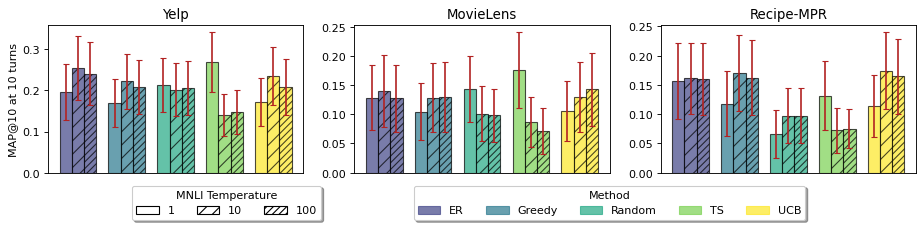

In [27]:
def map_10_temp():
    # MAP@10 big plot
    folder_path = "./"
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    legend_methods = ['ER', 'Greedy', 'Random', 'TS', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    temps = ['1', '10', '100']
    alpha = 0.7
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 3), dpi=80)  

    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']

    noise_level = 0

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods)+1)] # +1 to stay syncronized with MonoLLM
    colors.pop(0)

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(titles[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(temps)))
        results_error = np.zeros((len(methods), len(temps)))

        for method_idx, method in enumerate(methods):
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/{method}/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[method_idx, row_num] = exp_results.loc[row_num, "map@9"]
                results_error[method_idx, row_num] = (exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]) / 2

        # Plot bars on subplot
        multiplier = 0
        for temp_idx, temp in enumerate(temps):
                offset = width * multiplier
                # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
                rects = ax.bar(x + offset, results[:, temp_idx], width, yerr=results_error[:,temp_idx], hatch=hatches[temp_idx], alpha=alpha, color=colors, label=temp, edgecolor = "black", ecolor='firebrick', capsize=3)
                # error_bars = ax.errorbar(x + offset, results[:,col_num, temp_idx], yerr=results_error[:,col_num], color="black")
                # ax.bar_label(rects, padding=3)
                multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=alpha) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in legend_methods], title='Method', loc='upper center', bbox_to_anchor=(1, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))
            
            # Opacity legend
            alpha_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatches[i], label=temps[i]) for i in range(len(noise_levels))]
            temp_legend = plt.legend(handles=alpha_patches, title='MNLI Temperature', loc='upper center', bbox_to_anchor=(-0.5, -0.05),
                    fancybox=True, shadow=True, ncol=len(temps))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "MAPat10_temp_noise0_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_temp()

### Cumulative Regret Plot

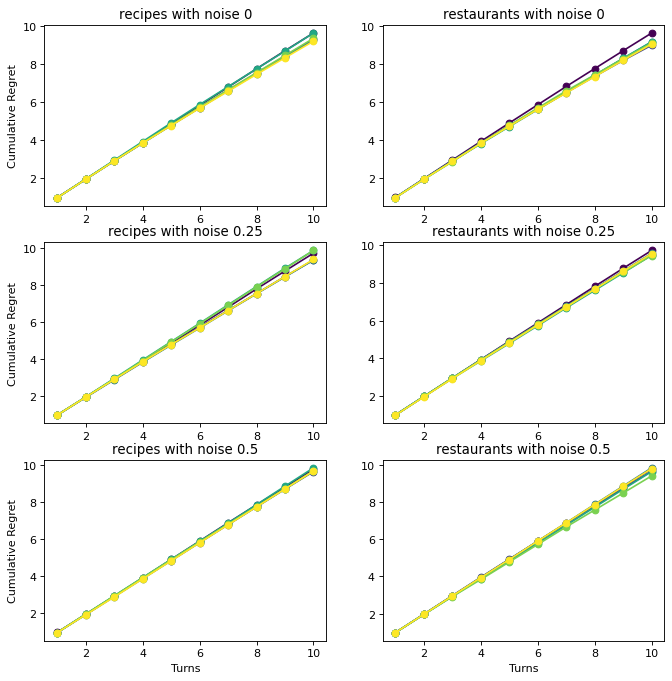

In [28]:
def cum_regret():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(10,10), dpi=80)

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] #TODO: Split on more than just color

    for noise_idx, noise_level in enumerate(noise_levels):

        for dataset_idx, dataset in enumerate(datasets):
            
            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                cum_regret = 0.0
                for turn in range(num_turns):
                    cum_regret += (1 - results_df.loc[row_num, 'P_1@%d' % turn])
                    row_maps.append(cum_regret)

                # TODO: Change this to use different kwargs for each method rather than only colors
                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker="o", linestyle="solid", color=colors[row_num], label=methods)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"Cumulative Regret")

                if noise_idx == (len(noise_levels) - 1):
                    # Add x-axis label if bottom subplot
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")

    # Save and show 
    file_name = "big_cum_regret_plot.png"
    fig.savefig(file_name)

    plt.show()

cum_regret()

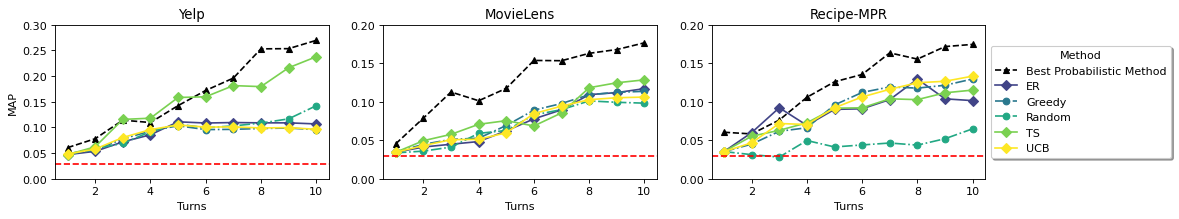

In [55]:
def map_plot_noise0_mnli0():
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.2,0.2]

    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']


    omit = [[],[],[]]

    baselines = [ # row number of the best method in our methods with T =/= 0
        4,4,5
    ]

    main_labels = ['ER','Greedy','Random','TS','UCB']

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': 'black', 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(15, 2.5), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/mnli0/aggregated_results.csv")

        # Plot baseline result
        baseline_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        baseline_row_maps = []
        for turn in range(num_turns):
                baseline_row_maps.append(baseline_results_df.loc[baselines[dataset_idx], 'map@%d' % turn])
        ax.plot(np.linspace(1,num_turns,num_turns), baseline_row_maps, marker=linetypes[0]['marker'], linestyle=linetypes[0]['line'], color=linetypes[0]['color'], label="Best Probabilistic Method")

        for row_num in range(len(results_df)):
            if (methods[row_num+1] in omit[dataset_idx]):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num+1]['marker'], linestyle=linetypes[row_num+1]['line'], color=linetypes[row_num+1]['color'], label=main_labels[row_num])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = ax.legend(title='Method', loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=1)

            ax.set_xlabel(f"Turns")


        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        # box = ax.get_position()
        # ax.set_position([box.x0 , box.y0 + box.height * 0.2,
        #                 box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_mnli0()

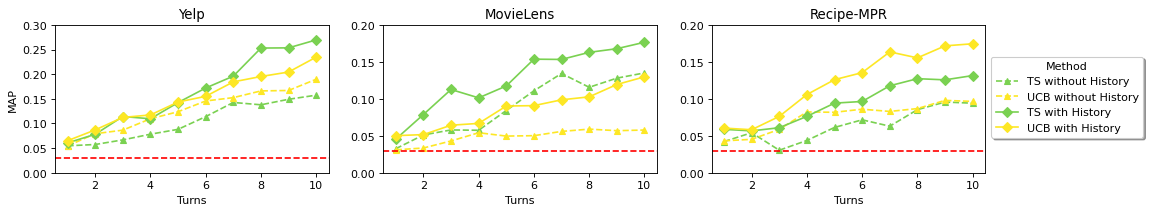

In [54]:
def map_plot_no_history():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants','movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.2,0.2]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # keep_subset = [
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        no_hist_results_df = pd.read_csv(f"organized_results/{dataset}/no_history/aggregated_results.csv")
        
        for row_num in range(len(no_hist_results_df)):
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(no_hist_results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker="^", linestyle="dashed", color=linetypes[row_num+4]['color'], label=f"{methods[row_num+4]} without History")

        best_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")


        # NOTE: Some hard-coding here
        thompson_maps = []
        for turn in range(num_turns):
            thompson_maps.append(best_results_df.loc[4, 'map@%d' % turn])

        ax.plot(np.linspace(1,num_turns,num_turns), thompson_maps, marker="D", linestyle="solid", color=linetypes[4]['color'], label="TS with History")
        
        ucb_maps = []
        for turn in range(num_turns):
            ucb_maps.append(best_results_df.loc[5, 'map@%d' % turn])
            
        ax.plot(np.linspace(1,num_turns,num_turns), ucb_maps, marker="D", linestyle="solid", color=linetypes[5]['color'], label="UCB with History")


        ax.set_ylim(0,y_maxs[dataset_idx])

        if dataset_idx == 0:
            # Add y-axis label if left-hand subplot
            ax.set_ylabel(f"MAP")
            
        # Add legend above middle plot
        if dataset_idx == 2:       
            methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(1.3, 0.2), fancybox=True, shadow=True, ncol=1)

        ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_no_history()

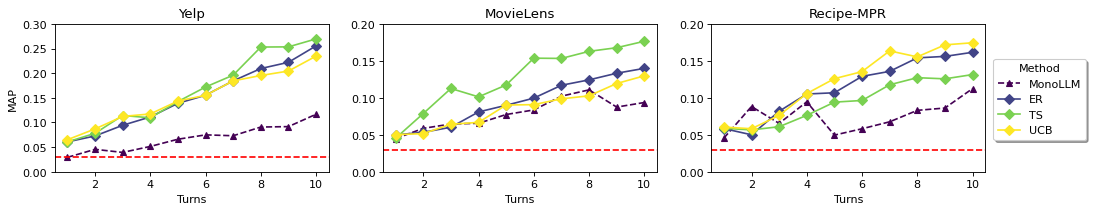

In [66]:
def map_plot_noise0_row():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.2,0.2]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    keep_subset = [
        ['MonoLLM','Thompson','UCB','ER'],
        ['MonoLLM','Thompson','UCB','ER'],
        ['MonoLLM','Thompson','UCB','ER'],
    ]

    # keep_subset = [
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['UCB', 'Random', 'Greedy'],
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    total_keeps = ['MonoLLM','ER','Thompson','UCB']
    labels = ['MonoLLM','ER','TS','UCB']
    # total_keeps = ['Greedy','Random','Thompson','UCB']
    # labels = ['Greedy','Random','TS','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.2, 0.8),
                        fancybox=True, shadow=True, ncol=1)
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_row()

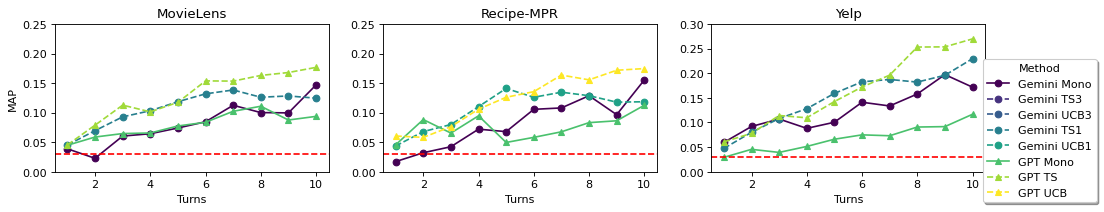

In [18]:
def map_plot_gemini():
    datasets = ['movies', 'recipes', 'restaurants']
    # datasets = ['restaurants', 'restaurants', 'restaurants']
    titles = ['MovieLens', 'Recipe-MPR', 'Yelp']
    methods = ['Gemini Mono', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'GPT Mono', 'GPT TS', 'GPT UCB']

    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.25,0.25,0.3]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    keep_subset = [
        ['Gemini Mono', 'Gemini TS1', 'GPT Mono', 'GPT TS'],
        ['Gemini Mono', 'Gemini UCB1', 'GPT Mono', 'GPT UCB'],
        ['Gemini Mono', 'Gemini TS1', 'GPT Mono', 'GPT TS'],
    ]

    # keep_subset = [
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['UCB', 'Random', 'Greedy'],
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': 'o', 'line': 'solid'},
        {'color': colors[1], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[2], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[4], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[5], 'marker': '^', 'line': 'solid'},
        {'color': colors[6], 'marker': '^', 'line': 'dashed'},
        {'color': colors[7], 'marker': '^', 'line': 'dashed'},
    ]

    # For when not all lines are in every plot
    total_keeps = ['Gemini Mono', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'GPT Mono', 'GPT TS', 'GPT UCB']
    labels = ['Gemini Mono', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'GPT Mono', 'GPT TS', 'GPT UCB']
    # total_keeps = ['Greedy','Random','Thompson','UCB']
    # labels = ['Greedy','Random','TS','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/gemini/aggregated_results.csv")
        # results_df = pd.read_csv(f"experiments/jul_29_gem_gpt_{dataset}_ucb_100_items_100_users_sweep/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.2, 0.8),
                        fancybox=True, shadow=True, ncol=1)
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_gemini()

In [31]:
from tabulate import tabulate

def table_generator():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['Mono Gemini', 'Mono GPT', 'PEBOL TS', 'PEBOL UCB']
    row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
    ]

    for dataset_idx, dataset in enumerate(datasets): 

        # results_df = pd.read_csv(f"organized_results/{dataset}/gemini/methods/aggregated_results.csv")
        results_df = pd.read_csv(f"experiments/jun_15_gem_gpt_mono_{dataset}_100_items_100_users/aggregated_results.csv")
        
        table_dict = {}
        
        for turn in range(num_turns):
            col_list = []
            for row in range(len(methods)):
                if methods[row] in keep_names[dataset_idx]:
                    mean = results_df.loc[row, f"map@{turn}"]
                    ci_top = results_df.loc[row, f"map@{turn}_ub"]
                    ci_bottom = results_df.loc[row, f"map@{turn}_lb"]
                    col_list.append(mean)
                    col_list.append(ci_bottom)
                    col_list.append(ci_top)
            table_dict[f"{turn}"] = col_list

        final_df = pd.DataFrame(table_dict, index=row_names)
        final_df = final_df.round(2)
        final_df.index.name = "Turn"

        print(f"{titles[dataset_idx]}")
        with open(f'table_{dataset}.txt', 'w') as f:
            f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            # f.write(print(final_df))
        # final_df.to_html('temp_table.html')



table_generator()

Yelp
Recipe-MPR
MovieLens


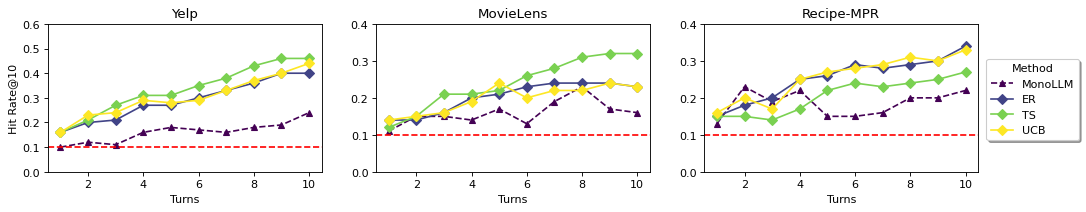

In [67]:
def recall_plot_noise0_row():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.6,0.4,0.4]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    keep_subset = [
        ['MonoLLM','Thompson','UCB','ER'],
        ['MonoLLM','Thompson','UCB','ER'],
        ['MonoLLM','Thompson','UCB','ER'],
    ]

    # keep_subset = [
    #     ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    #     ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    #     ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    total_keeps = ['MonoLLM','ER','Thompson','UCB']
    labels = ['MonoLLM','ER','TS','UCB']
    # total_keeps = ['Greedy','Random','Thompson','UCB']
    # labels = ['Greedy','Random','TS','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'recall_10@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"Hit Rate@10")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.2, 0.8),
                        fancybox=True, shadow=True, ncol=1)
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        random_hit_rate= num_recs / num_items
        ax.axhline(y=random_hit_rate, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_recall_plot.png"
    fig.savefig(file_name)

    plt.show()

recall_plot_noise0_row()

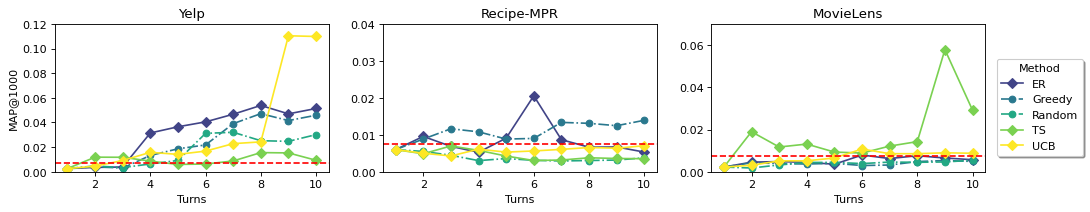

In [9]:

def map_plot_1000_items():
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 1000
    num_recs = 1000
    y_maxs = [0.12,0.04,0.07]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # keep_subset = [
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['Thompson', 'UCB', 'Random', 'Greedy', 'ER'],
        ['Thompson', 'UCB', 'Random', 'Greedy', 'ER'],
        ['Thompson', 'UCB', 'Random', 'Greedy', 'ER'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    # total_keeps = ['MonoLLM','ER','Thompson','UCB']
    # labels = ['MonoLLM','ER','TS','UCB']
    total_keeps = ['ER','Greedy','Random','Thompson','UCB']
    labels = ['ER', 'Greedy','Random','TS','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/1000_items_10_users/{dataset}/aggregated_results_1000.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num+1] in keep_subset[dataset_idx])):
                print(results_df.loc[row_num, 'Experiment Name'])
                print(methods[row_num+1])
                print(keep_subset[dataset_idx])
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            # print(results_df.loc[row_num, 'Experiment Name'])
            # print(row_maps)
            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num+1]['marker'], linestyle=linetypes[row_num+1]['line'], color=linetypes[row_num+1]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP@1000")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.2, 0.8),
                        fancybox=True, shadow=True, ncol=1)
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_1000_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_1000_items()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


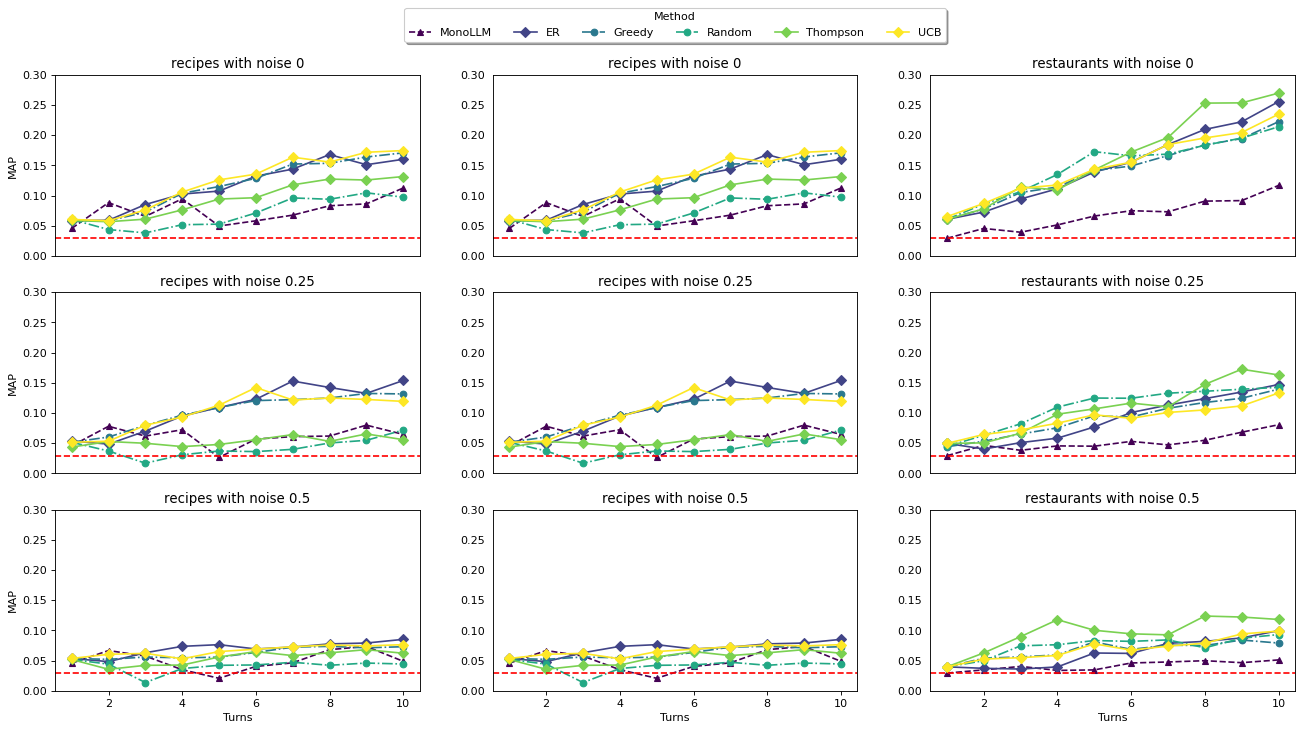

In [3]:
def map_plot_noise_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)  

    for dataset_idx, dataset in enumerate(datasets):

        for noise_idx, noise_level in enumerate(noise_levels):

            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

                axs[noise_idx, dataset_idx].set_ylim(0,y_max)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                if noise_idx+1 == len(noise_levels):
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='x',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--")

            # # Shrink current axis's height by 10% on the bottom for legends
            # box = axs[noise_idx, dataset_idx].get_position()
            # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
            #                 box.width, box.height * 0.9])
            
        methods_legend = axs[0, 1].legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.4),
            fancybox=True, shadow=True, ncol=len(methods))

    # Save and show 
    file_name = "big_map_grid_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise_grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


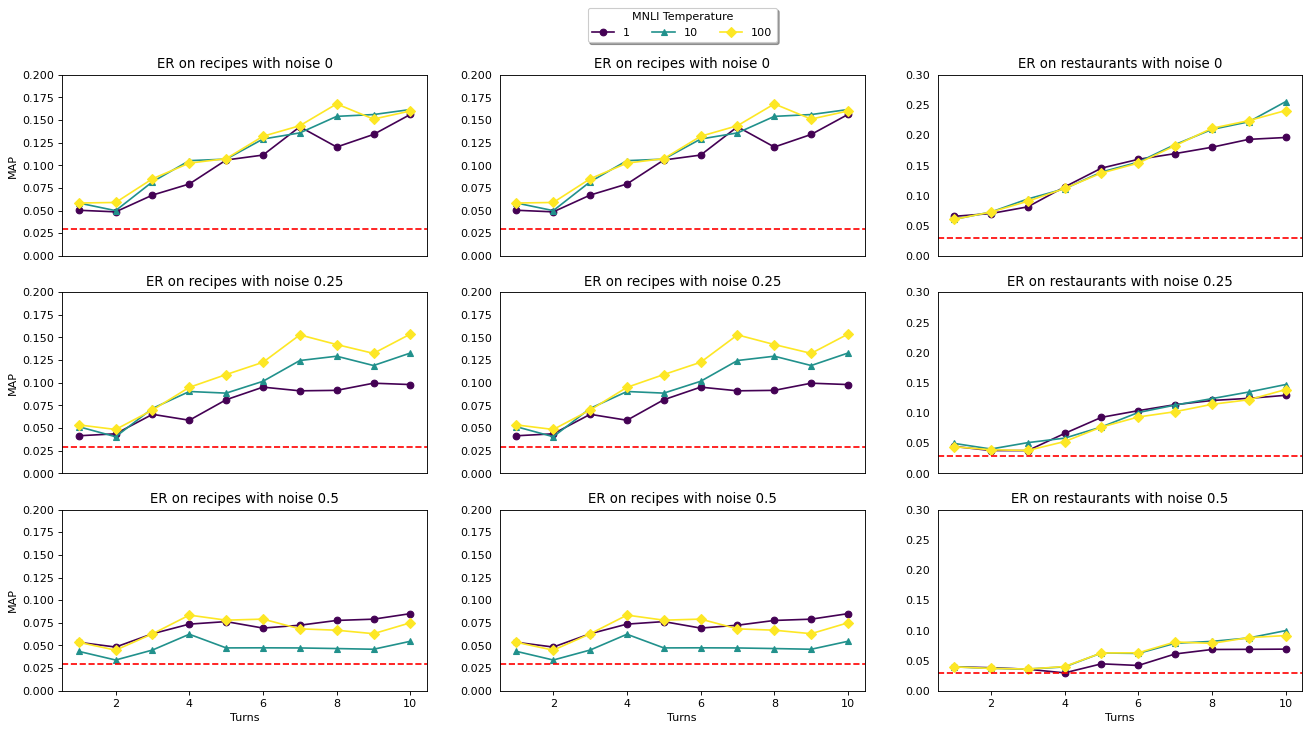

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


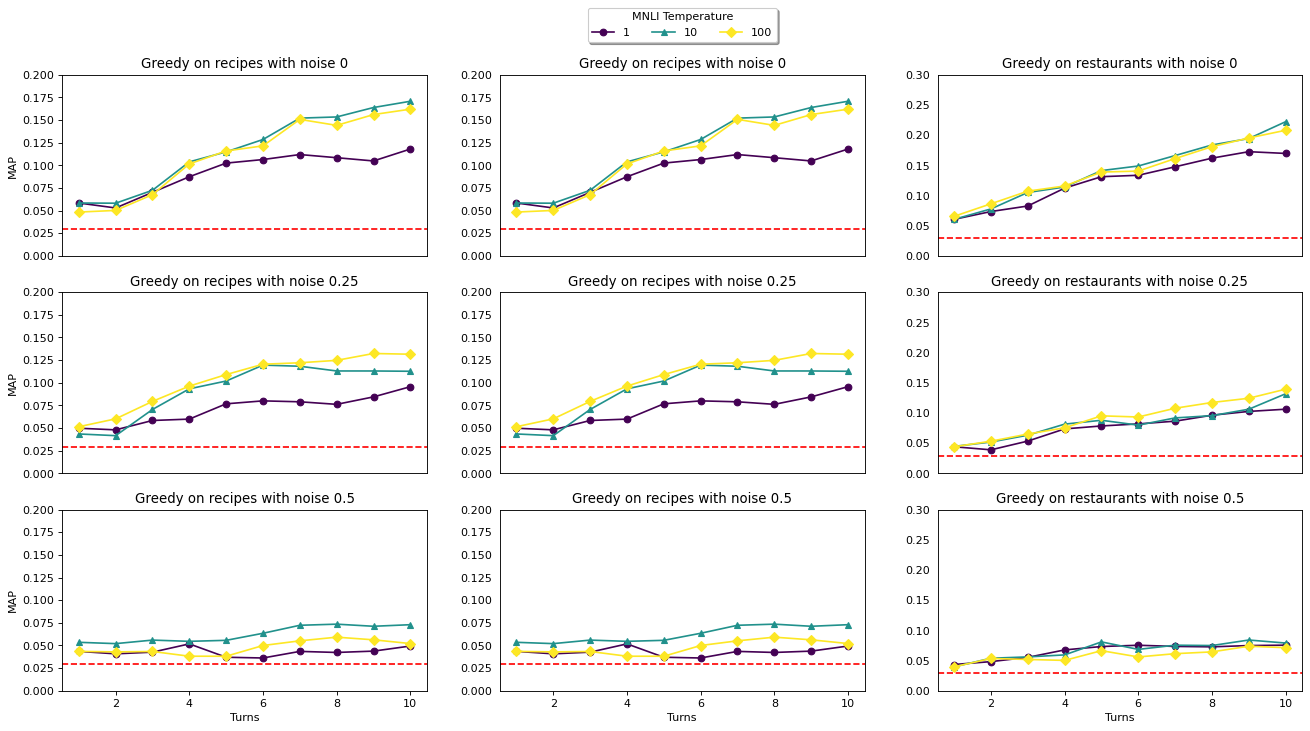

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


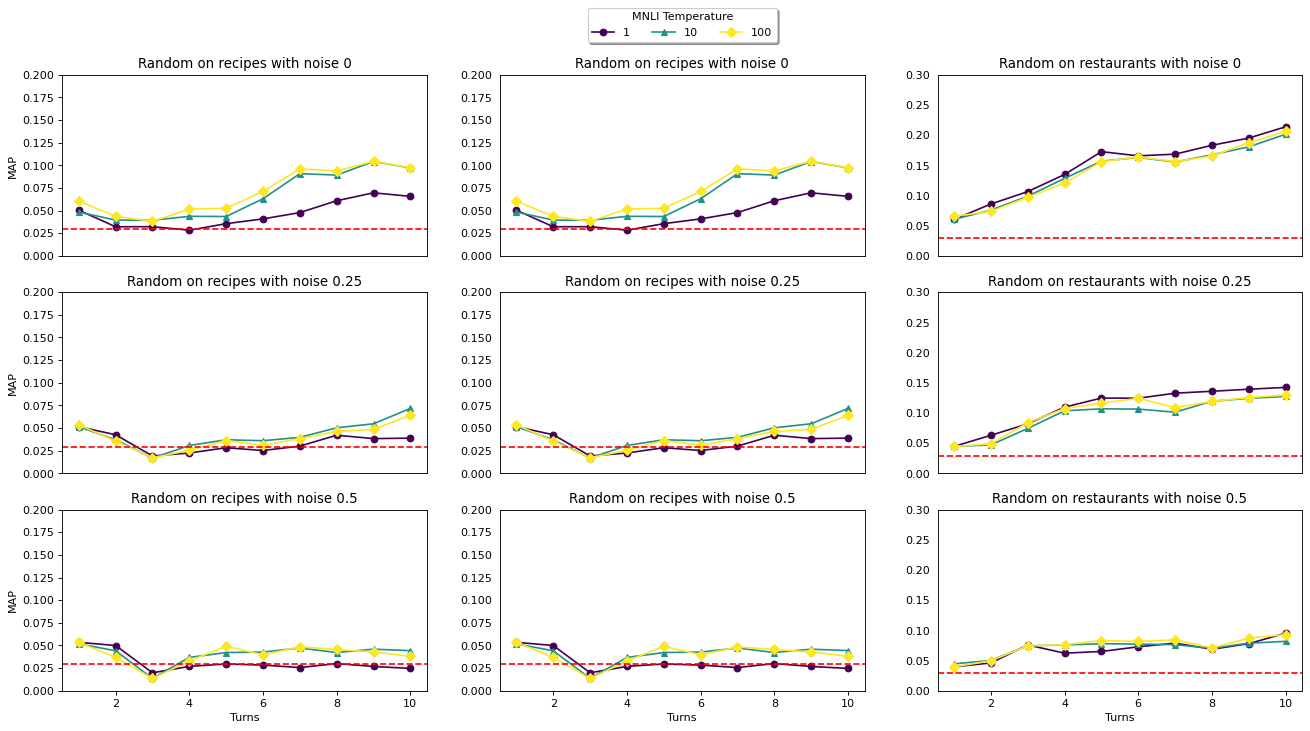

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


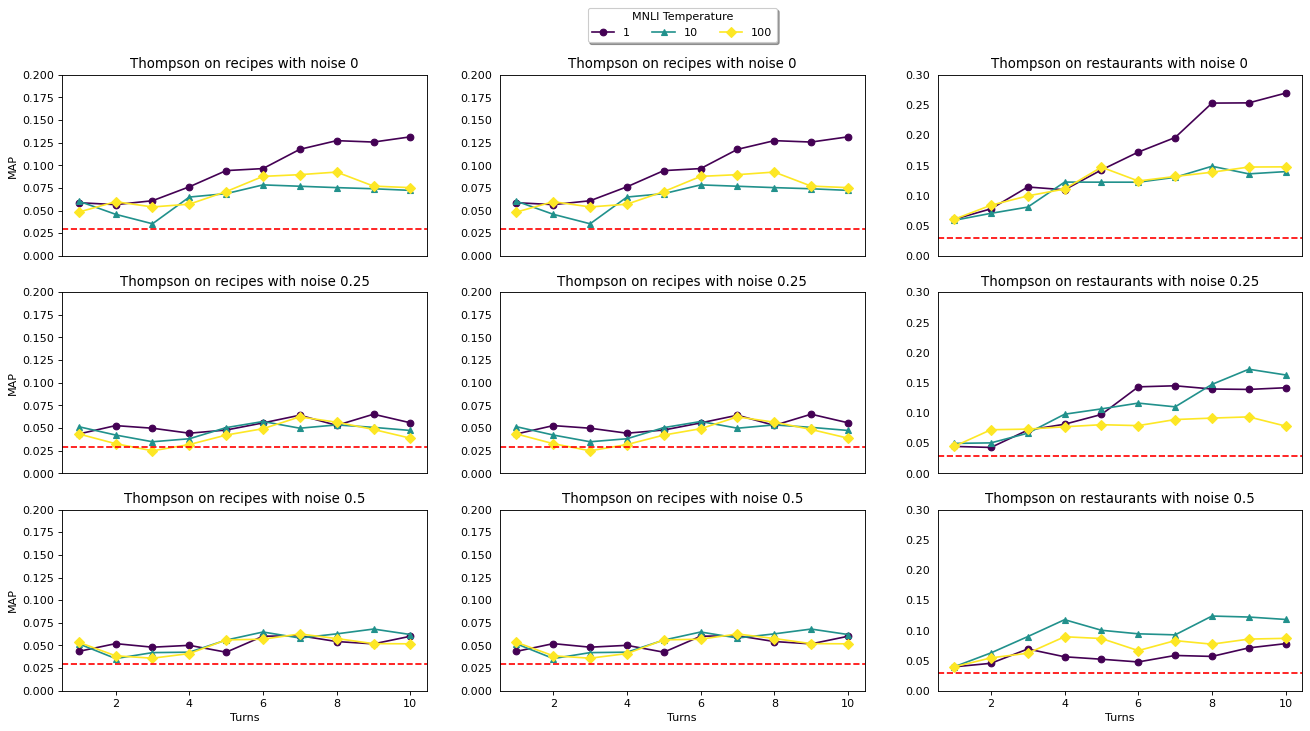

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


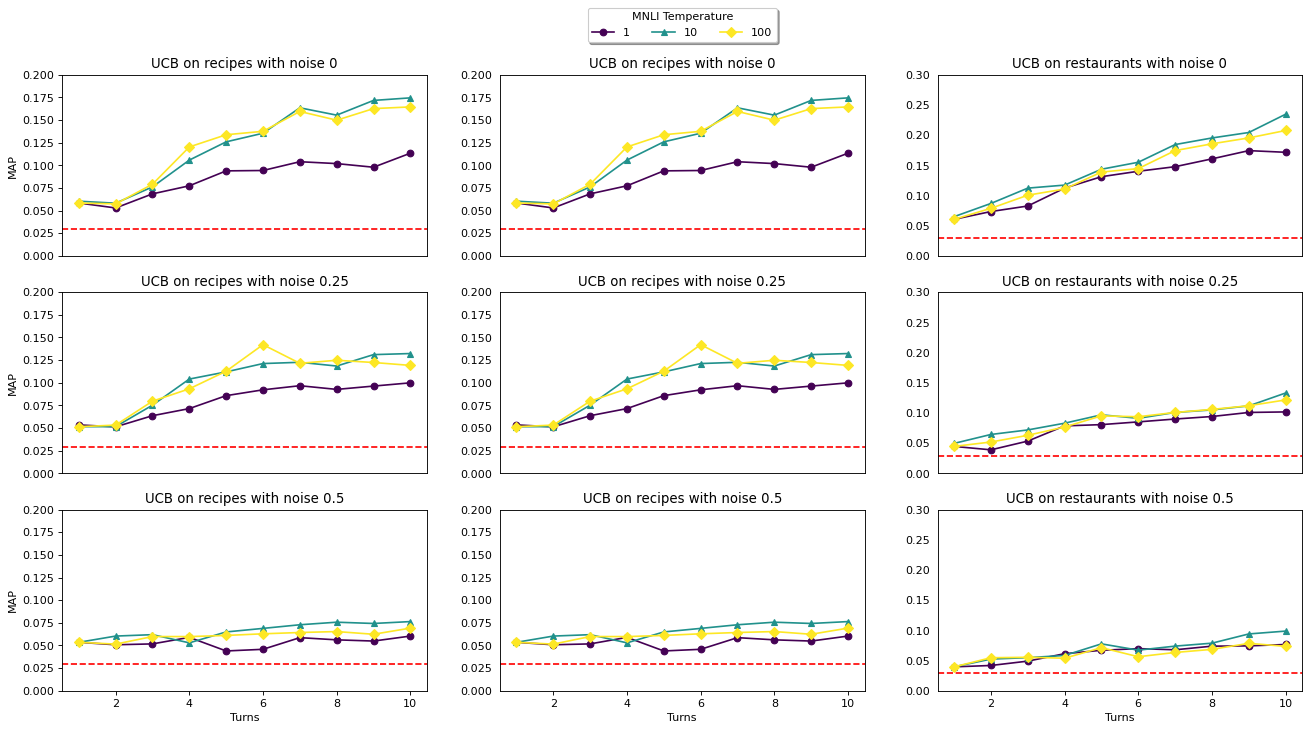

In [4]:
def map_plot_temp_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    temps = [1,10,100]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.2, 0.2, 0.3]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(temps))] 

    linetypes = [
        {'color': colors[0], 'marker': 'o', 'line': 'solid'}, 
        {'color': colors[1], 'marker': '^', 'line': 'solid'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'},
    ]

    for method in methods:

        fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)     

        for dataset_idx, dataset in enumerate(datasets):

            for noise_idx, noise_level in enumerate(noise_levels):

                axs[noise_idx, dataset_idx].set_title(f"{method} on {dataset} with noise {noise_level}")

                results_df = pd.read_csv(f"organized_results/{dataset}/{method}/noise{noise_level}/aggregated_results.csv")

                for row_num in range(len(results_df)):
                    row_maps = []
                    for turn in range(num_turns):
                        row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                    axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=temps[row_num])

                    axs[noise_idx, dataset_idx].set_ylim(0,y_maxs[dataset_idx])

                    if dataset_idx == 0:
                        # Add y-axis label if left-hand subplot
                        axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                    else:
                        axs[noise_idx, dataset_idx].tick_params(
                            axis='y',          # changes apply to the y-axis
                            which='both',      # both major and minor ticks are affected
                            right=False,      # ticks along the bottom edge are off
                            left=False,         # ticks along the top edge are off
                            labelbottom=False) # labels along the bottom edge are off

                    if noise_idx+1 == len(noise_levels):
                        axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                    else:
                        axs[noise_idx, dataset_idx].tick_params(
                            axis='x',          # changes apply to the y-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            labelbottom=False) # labels along the bottom edge are off

                p_select_position = 1 / num_items
                total_maps = 0.0
                for i in range(num_recs):
                    total_maps += (1 / (i+1))
                total_maps *= p_select_position
                # print(total_maps)
                axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--")

                # # Shrink current axis's height by 10% on the bottom for legends
                # box = axs[noise_idx, dataset_idx].get_position()
                # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
                #                 box.width, box.height * 0.9])
                
            temps_legend = axs[0, 1].legend(title='MNLI Temperature', loc='upper center', bbox_to_anchor=(0.5, 1.4),
                fancybox=True, shadow=True, ncol=len(temps))

        # Save and show 
        file_name = f"big_mnli_temp_map_grid_plot_{method}.png"
        fig.savefig(file_name)

        plt.show()

map_plot_temp_grid()

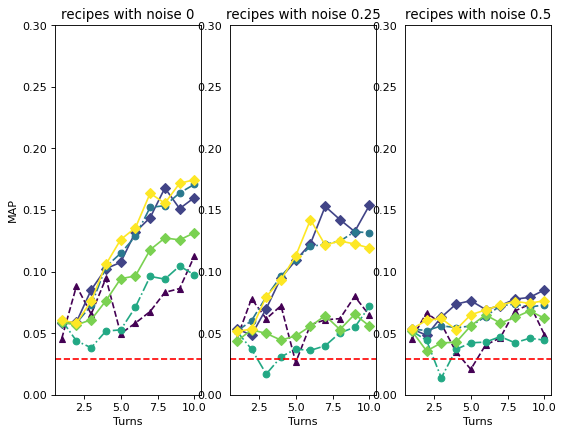

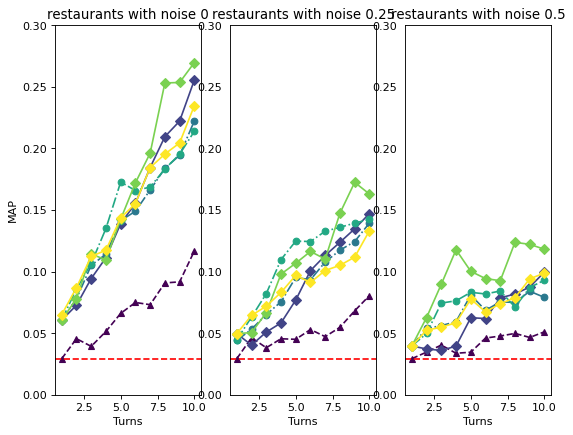

In [60]:
def map_binary_vs_prob():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    

    for dataset_idx, dataset in enumerate(datasets):

        fig = plt.figure(figsize=(8, 6), dpi=80)  

        for noise_idx, noise_level in enumerate(noise_levels):

            ax = fig.add_subplot(1,len(noise_levels), noise_idx+1)

            ax.set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods)

                ax.set_ylim(0,y_max)

                if noise_idx == 0:
                    # Add y-axis label if left-hand subplot
                    ax.set_ylabel(f"MAP")
                else:
                    ax.tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                ax.set_xlabel(f"Turns")

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            ax.axhline(y=total_maps, color="r", linestyle="--")

        # Save and show 
        file_name = "big_map_plot.png"
        fig.savefig(file_name)

        plt.show()

map_binary_vs_prob()

Using MPS


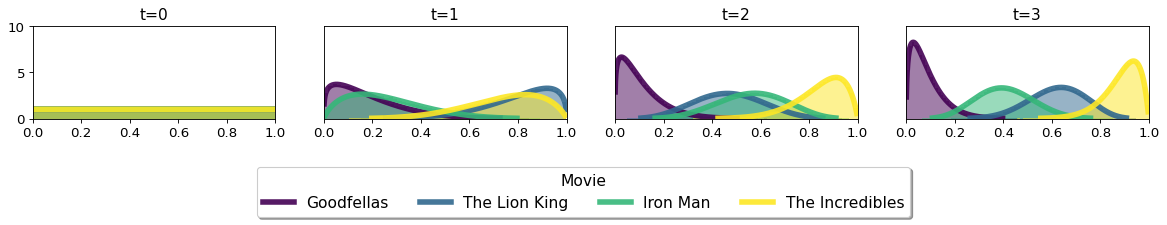

In [26]:

# Crime NO, Children YES, Superhero YES, animated YES -> looking for incredibles

from item_scorers.mnli_scorer import MNLIScorer
import yaml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def custom_beta_plot():
    movies = {
                # 0: {"description": "Movie Title: Heat (1995) \n Genres: Action, Crime, Thriller \n Tags: Al Pacino, Robert De Niro, realistic action, great acting, suspense, atmospheric, crime, tense, dialogue, bank robbery, long, Michael Mann, gunfight, Val Kilmer, Natalie Portman, realistic, overrated, philosophy, Los Angeles, visceral"},
                # 1: {"description": "Movie Title: Guardians of the Galaxy (2014) \n Genres: Action, Adventure, Sci-Fi \n Tags: great soundtrack, sci-fi, space, Marvel, fun, Great Visuals, Marvel Cinematic Universe, adventure, humorous, Chris Pratt, childish, fantasy, science fiction, Action, superhero, overrated, talking animals, characters with individual goals, comic book, Vin Diesel"},
                2: {"title": "Goodfellas", "description": "Movie Title: Goodfellas (1990) \n Genres: Crime, Drama \n Tags: Martin Scorsese, mafia, organized crime, dark comedy, Robert De Niro, good dialogue, crime, masterpiece, gangsters, violence, Samuel L. Jackson, Ray Liotta, narrated, robert de niro, stylish, Joe Pesci, gritty, disturbing, based on a book, biography"},
                # 3: {"description": "Movie Title: Penguins of Madagascar (2014) \n Genres: Adventure, Animation, Children, Comedy \n Tags: talking animals, comedy, humorous, Animation, Christopher Knights, Eric Darnell, Simon J. Smith, Tom McGrath, adventure, franchise, good versus evil, octopus gets bad rap, series:madagascar, the north wind, watch the credits, 3d, Bechdel test:Fail, IMAX DMR 3-D, IMAX Digital only, MOLT_CRITICADA"},
                # 4: {"title": "Schindler's List", "description": "Movie Title: Schindler's List (1993) \n Genres: Drama, War \n Tags: World War II, true story, Steven Spielberg, holocaust, based on a true story, Holocaust, historical, thought-provoking, Nazis, black and white, history, disturbing, Oscar (Best Picture), Liam Neeson, atmospheric, WWII, classic, drama, Oscar (Best Cinematography), war"},
                5: {"title": "The Lion King", "description": "Movie Title: Lion King, The (1994) \n Genres: Adventure, Animation, Children, Drama, Musical, IMAX \n Tags: Disney, animation, coming of age, animals, musical, soundtrack, lions, father-son relationship, talking animals, africa, Oscar (Best Music - Original Song), inspirational, classic, Disney animated feature, Hans Zimmer, Oscar (Best Music - Original Score), Childhood, Matthew Broderick, fun, Rowan Atkinson"},
                6: {"title": "Iron Man", "description": "Movie Title: Iron Man (2008) \n Genres: Action, Adventure, Sci-Fi \n Tags: superhero, Robert Downey Jr., Marvel, technology, comic book, sci-fi, funny, action, Gwyneth Paltrow, superheroes, based on a comic, vigilante, Jeff Bridges, Robert Downey Jr, military, Iron Man, Marvel Cinematic Universe, adventure, visually appealing, arms dealer"},
                7: {"title": "The Incredibles", "description": "Movie Title: Incredibles, The (2004) \n Genres: Action, Adventure, Animation, Children, Comedy \n Tags: Pixar, superhero, animation, comedy, family, super-hero, Adventure, action, Disney, funny, Samuel L. Jackson, imdb top 250, superheroes, stylized, Oscar (Best Animated Feature), comic book, self discovery, alter ego, secret identity, Animation"},
                # 8: {"description": "Movie Title: Sin City (2005) \n Genres: Action, Crime, Film-Noir, Mystery, Thriller \n Tags: stylized, Quentin Tarantino, multiple storylines, atmospheric, black comedy, Bruce Willis, comic book, visually appealing, violence, dark, storytelling, brutality, surrealism, artistic, surreal, Action, Frank Miller, Nudity (Topless), cannibalism, violent"}
    }

    config_path = "./experiments/jan_19_movies_100_users_noise0_ucb/noise_0_selection_ucb_mnli_temp_1/config.yaml"
    with open(config_path, "r") as config_file:
        config_dict = yaml.safe_load(config_file)
    config_dict['item_scoring']['batch_size'] = len(movies)
    mnli = MNLIScorer(config_dict)
    beliefs = {
        # 0: {"alpha": 0.5, "beta": 0.5},
        # 1: {"alpha": 0.5, "beta": 0.5},
        2: {"alpha": 1, "beta": 1},
        # 3: {"alpha": 0.5, "beta": 0.5},
        # 4: {"alpha": 0.5, "beta": 0.5},
        5: {"alpha": 1, "beta": 1},
        6: {"alpha": 1, "beta": 1},
        7: {"alpha": 1, "beta": 1},
        # 8: {"alpha": 0.5, "beta": 0.5},
    }

    # Set up variables for plotting
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(beliefs))] 
    fig = plt.figure(figsize=(18, 1.5), dpi=80) 
    y_max = 10
    hist_samples = 50000
    line_samples = 10000

    prefs = ['child appropriate', 'superhero', 'animated']
    # prefs = ['animated'] 
    title_font_size = 14
    major_ticks_font_size = 12
    minor_ticks_font_size = 12
    label_font_size = 14
    legend_font_size = 14
    legend_title_font_size = 14

    # Create base figure
    ax = fig.add_subplot(1,len(prefs)+1, 1)
    ax.set_title(f"t=0", fontsize=title_font_size)
    for i, (belief_id, belief) in enumerate(beliefs.items()):   
        a = belief['alpha']
        b = belief['beta']
        x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
        ax.plot(x, stats.beta.pdf(x, a, b), color=colors[i], lw=5, alpha=0.9, label=movies[belief_id]['title'])

        # Dist plot
        data = np.random.beta(a,b, size=hist_samples)
        ax.hist(data, 50, color=colors[i], lw=5, alpha=0.5, density=True)
        # ax.set_ylabel("$p(u_i|x_i, \mathcal{H}^{t-1},\omega)$", fontsize=label_font_size)
        # ax.set_xlabel("$u_i$", fontsize=label_font_size)
        ax.set_ylim(0,y_max)
        ax.set_xlim(0,1.0)
        ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
        ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)

    for pref_num, pref in enumerate(prefs):
        like_probs = mnli.score_items(pref, movies)
        # print("like_probs:", like_probs)
        stretch_factor = 5
        for item_id in movies:
                new_alpha = beliefs[item_id]['alpha'] + stretch_factor*like_probs[item_id] # new_alpha = old_alpha + L
                new_beta = stretch_factor*(1 - like_probs[item_id]) + beliefs[item_id]['beta'] # new_beta = 1 - L + old_beta
                beliefs[item_id] = {'alpha': new_alpha, 'beta': new_beta}

        # Now plot the beta distributions:
        ax = fig.add_subplot(1,len(prefs)+1, pref_num+2)
        ax.set_title(f"t={pref_num + 1}", fontsize=title_font_size)
        for i, (belief_id, belief) in enumerate(beliefs.items()):   
            a = belief['alpha']
            b = belief['beta']
            x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
            ax.plot(x, stats.beta.pdf(x, a, b), color=colors[i], lw=5, alpha=0.9, label=movies[belief_id]['title'])

            # Dist plot
            data = np.random.beta(a,b, size=hist_samples)
            ax.hist(data, 50, color=colors[i], lw=5, alpha=0.5, density=True)
            ax.set_yticks([])
            ax.set_ylim(0,y_max)
            ax.set_xlim(0,1.0)
            ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
            ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)

        # ax.set_xlabel("$u_i$", fontsize=label_font_size)

        if pref_num == 1:
            methods_legend = ax.legend(title='Movie', loc='lower center', bbox_to_anchor=(-0.13, -1.15),
                fancybox=True, shadow=True, ncol=len(movies), fontsize=legend_font_size, title_fontsize=legend_title_font_size)
    plt.show()
    

custom_beta_plot()


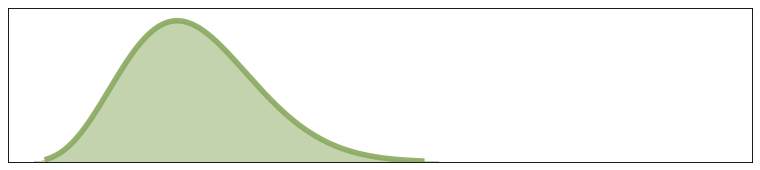

In [58]:
import yaml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def mini_beta_plot():
    fig = plt.figure(figsize=(12, 2.5), dpi=80) 
    y_max = 5
    hist_samples = 10000000
    line_samples = 10000000

    title_font_size = 14
    major_ticks_font_size = 12
    minor_ticks_font_size = 12
    label_font_size = 14
    legend_font_size = 14
    legend_title_font_size = 14

    # Create base figure
    ax = fig.add_subplot(1,1,1)
    # ax.set_title(f"t=0", fontsize=title_font_size)

    # #81689B - purple
    # a = 6
    # b = 3
    # #f3db72 - yellow
    # a = 5.5
    # b = 7.5
    # #89A95E - green
    a = 6
    b = 18
    x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
    ax.plot(x, stats.beta.pdf(x, a, b), color="#89A95E", lw=5, alpha=0.9)

    # Dist plot
    data = np.random.beta(a,b, size=hist_samples)
    ax.hist(data, 500, color="#89A95E", lw=5, alpha=0.5, density=True)

    ax.set_ylim(0,y_max)
    ax.set_xlim(0,1.0)
    ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
    ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    

mini_beta_plot()


In [70]:
def max_win():
    max_win = 0.0
    conditions = ""
    # datasets = ['recipes', 'recipes', 'restaurants']
    datasets = ['movies']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']

    for dataset in datasets:     
        mono_df = pd.read_csv(f"organized_results/{dataset}/mono/aggregated_results.csv")
        for method in methods:
            turn = 9
            results_df = pd.read_csv(f"organized_results/{dataset}/{method}/noise0/aggregated_results.csv")
            mono_score = mono_df.loc[0, 'map@%d' % turn]
            for row_num in range(len(results_df)):
                results_score = results_df.loc[row_num, 'map@%d' % turn]
                win = (results_score - mono_score) / mono_score
                if win > max_win:
                    max_win = win
                    conditions = f"{dataset}, {method}, {row_num}"

    print(max_win)
    print(conditions)
    
max_win()

0.8843759264749483
movies, Thompson, 0
